# Import necessary libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re
import io

# 1.  Load and preprocess the data

In [35]:
# Step 1: Read the data from a CSV file (provide the actual file path)
data = pd.read_csv("twitter_training.csv", header=None)

# Step 2: Assign custom column names since there's no header in your dataset
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Step 3: Display the DataFrame to check the result
print(data.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


# 2. Text cleaning (simplified)

In [36]:
# Define the text cleaning function
def clean_text(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.lower()  # Convert text to lowercase
        # You can add more cleaning steps here (e.g., removing punctuation, URLs, etc.)
        return text
    else:
        return ""  # Return an empty string for non-string values (NaN, float, etc.)


In [37]:
# Apply the cleaning function to the 'Text' column
data['clean_text'] = data['Text'].apply(clean_text)

# Display the cleaned data to verify
print(data[['Text', 'clean_text']])

                                                    Text  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Mac window partition is ...   
74679  Just realized the windows partition of my Mac ...   
74680  Just realized between the windows partition of...   
74681  Just like the windows partition of my Mac is l...   

                                              clean_text  
0      im getting on borderlands and i will murder yo...  
1      i am coming to the borders and i will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will 

# 3. Sentiment distribution

In [38]:
# Simulate different sentiments for a more complete example
# Modify two rows to have a sample of data with varied sentiments
data.loc[3, 'Sentiment'] = 'Negative'  # Change to "Negative"
data.loc[6, 'Sentiment'] = 'Neutral'  # Change to "Neutral"

# 4. Visualization of sentiment distribution with a bar chart

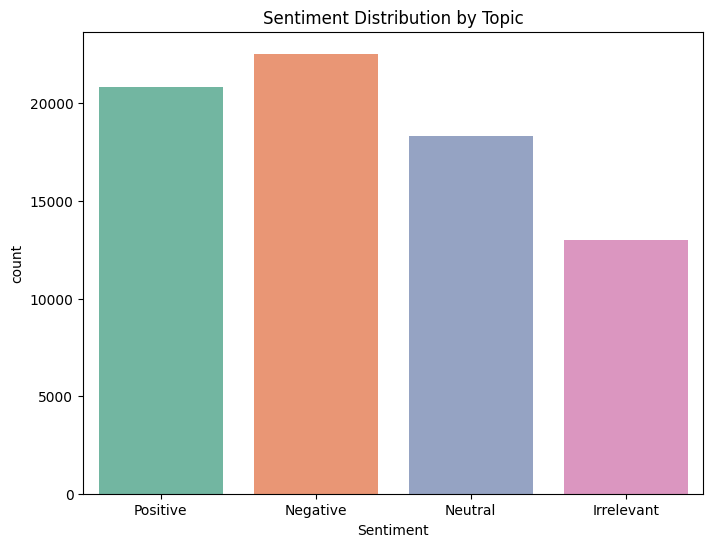

In [39]:

plt.figure(figsize=(8, 6))  # Set figure size
sns.countplot(x='Sentiment', data=data, palette='Set2')  # Bar chart for sentiment distribution
plt.title('Sentiment Distribution by Topic')  # Chart title
plt.show()  # Show the chart

# 5. Create a word cloud for positive texts

In [40]:
# Concatenate all texts associated with a "Positive" sentiment
positive_texts = " ".join(text for text in data[data['Sentiment'] == 'Positive']['clean_text'])


In [41]:
# Generate a word cloud based on positive texts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)


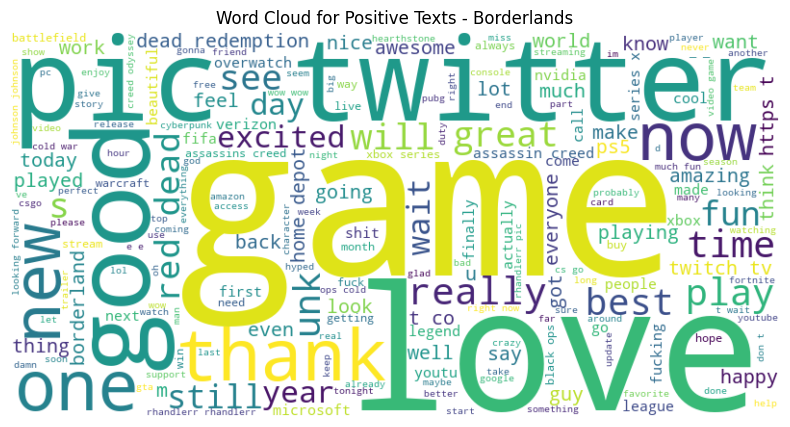

In [42]:
# Display the word cloud
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Turn off axes for better visibility
plt.title('Word Cloud for Positive Texts - Borderlands')  # Title of the word cloud
plt.show()  # Show the word cloud

# 6. Analyze the most frequent words in texts

In [43]:

# Download NLTK stopwords if not already done
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# Define a list of common words (stopwords) to remove
stop_words = set(stopwords.words('english'))

# Split texts into individual words and filter out stopwords
words = positive_texts.split()  # Split text into words
filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords


In [45]:

# Count the frequency of the most common words
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(10)  # Get the 10 most common words


In [46]:
# Convert to DataFrame for easier visualization
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# 7. Visualization of the most frequent words with a bar chart

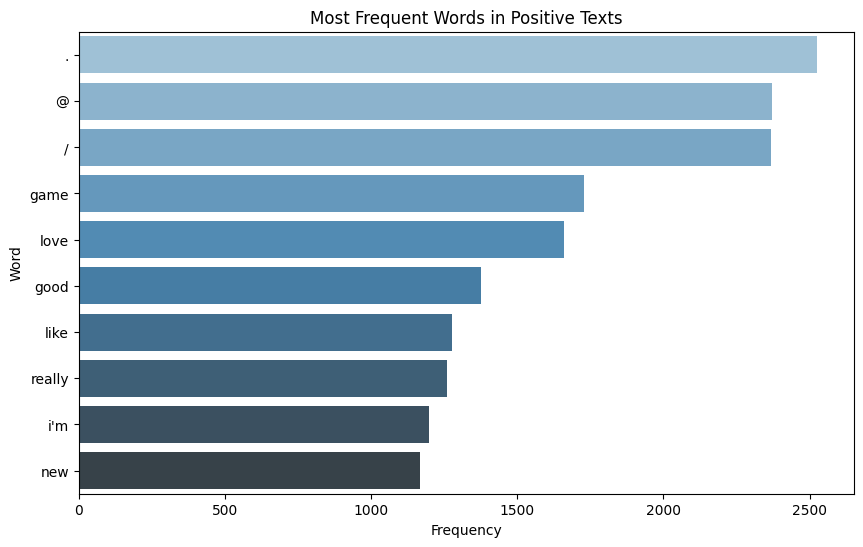

In [47]:

plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='Frequency', y='Word', data=most_common_df, palette='Blues_d')  # Bar chart for word frequency
plt.title('Most Frequent Words in Positive Texts')  # Chart title
plt.show()  # Show the chart

# 8. Sentiment distribution by topic

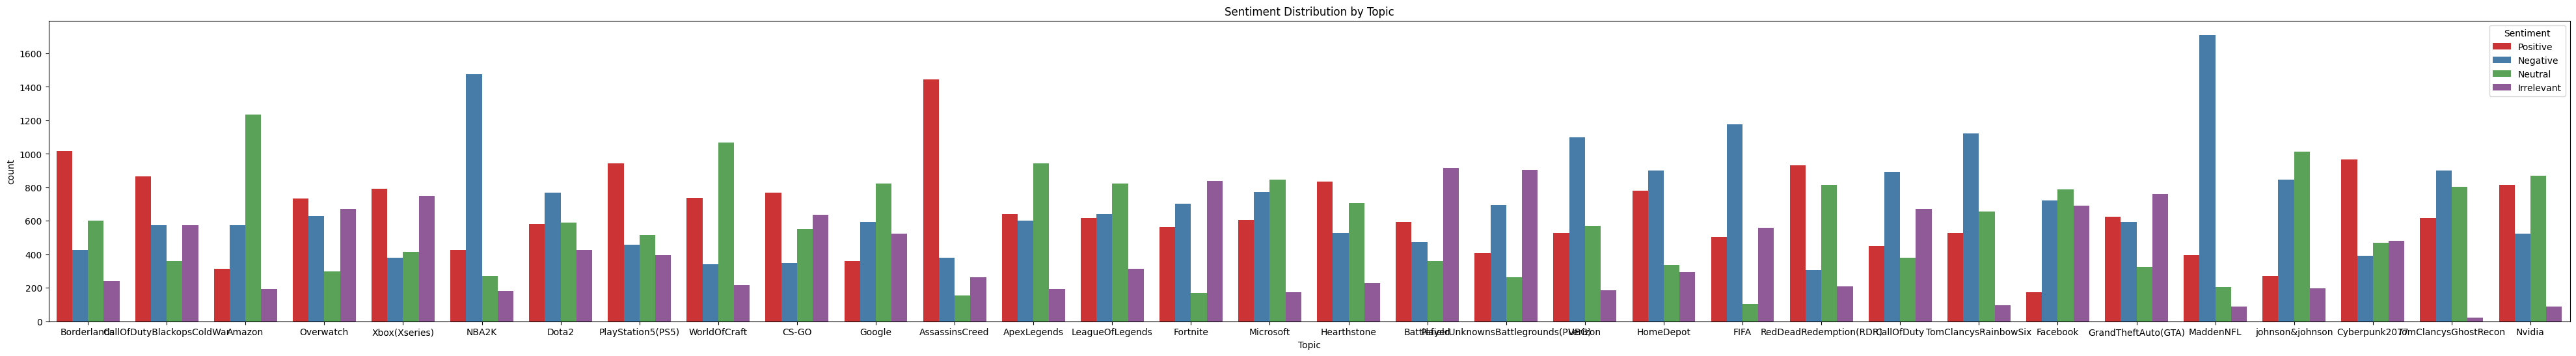

In [50]:

# Since all topics here are "Borderlands", this chart works better if you have multiple topics in the dataset
plt.figure(figsize=(50, 6))  # Set figure size
sns.countplot(x='Topic', hue='Sentiment', data=data, palette='Set1')  # Chart to show sentiment distribution by topic
plt.title('Sentiment Distribution by Topic')  # Chart title
plt.show()  # Show the chart